# Aufgabe 18

email.graph
NetworKit.Graph(n=1133, m=5451)

3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
3.0
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.0807513735940017
0.08075

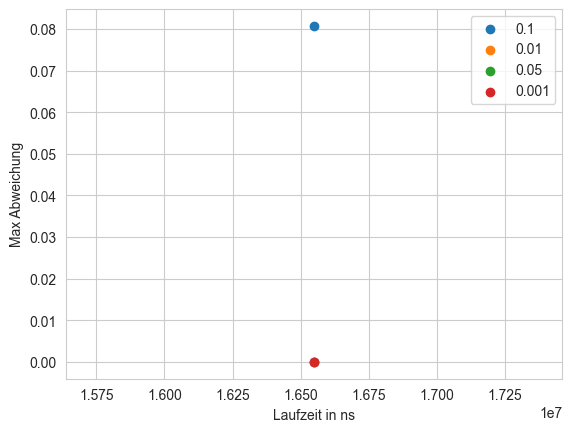

hep-th.graph
NetworKit.Graph(n=8361, m=15751)

1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6.180021481056294e-309
6

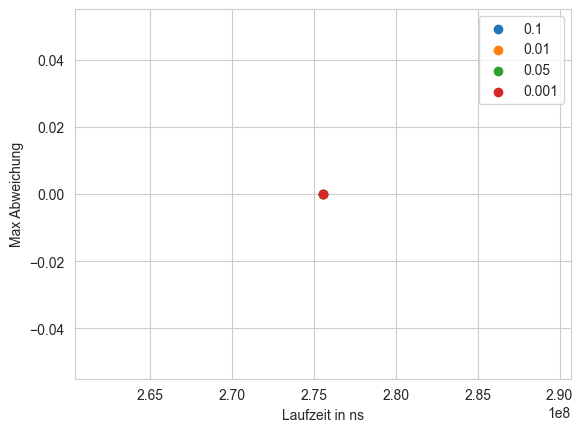

netscience.graph
NetworKit.Graph(n=1589, m=2742)

1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
1.7976931348623157e+308
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.0006297229219143577
0.000629

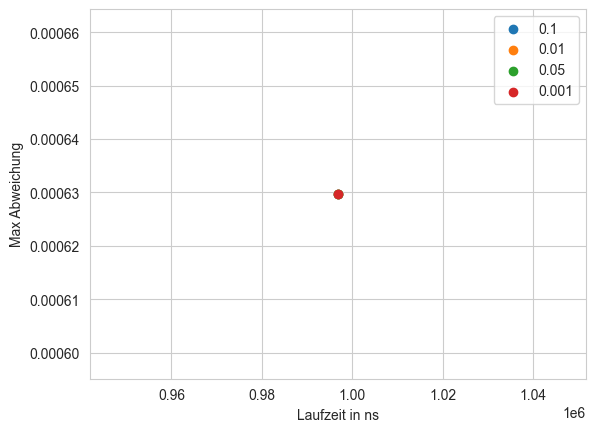

polblogs.graph
NetworKit.Graph(n=1490, m=16715)

4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
4.0
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.06600293040919591
0.0660029304091

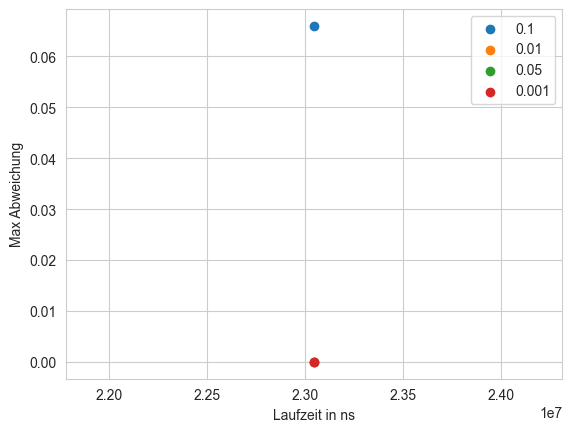

power.graph
NetworKit.Graph(n=4941, m=6594)

22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
22.0
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.004691745052710285
0.00469

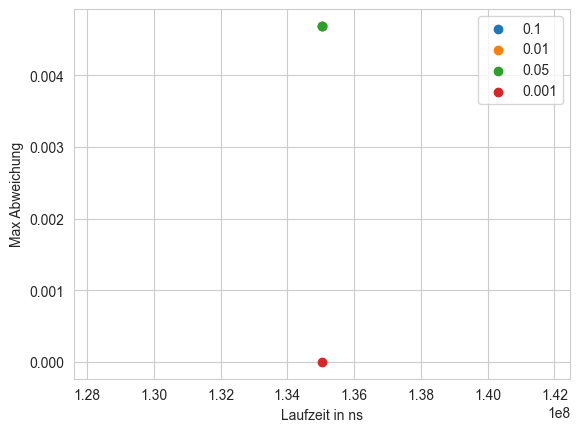

In [2]:
import random
import time
import os
import networkit as nk
from networkit import centrality
from networkit import distance
import matplotlib.pyplot as plt

errorBounds = {0.1, 0.05, 0.01, 0.001}
labels = list()

for file in os.listdir("./graphs2"):
     if file.endswith(".graph"):
        G: nk.Graph = nk.readGraph("./graphs2/" + file, nk.Format.METIS)

        print(file)
        print(G)
        print()

        topNumb = G.numberOfNodes()

        T1_start = time.time_ns()
        closeCen = nk.centrality.Closeness(G, False, True)
        closeCen.run()
        T1_stop = time.time_ns()

        u = random.randrange(G.numberOfNodes())
        v = u

        T2_start = time.time_ns()
        k = 10
        curValue = 0
        for i in range(1,k):
            while v == u:
                v = random.randrange(G.numberOfNodes())

            bfs = nk.distance.BFS(G, v)
            bfs.run()
            print(bfs.distance(u))
            curValue += ((G.numberOfNodes()/k) * (bfs.distance(u)/(G.numberOfNodes()-1)))
        T2_stop = time.time_ns()

        labels.append(file.__str__())

        for e in errorBounds:

            plt.xlabel("Laufzeit in ns")
            plt.ylabel("Max Abweichung")

            maxdiv = 0.0

            for x in range(topNumb):
                cenScore = closeCen.score(u)
                topkScore = 1/curValue

                curdiv = abs(cenScore - topkScore)

                print(curdiv)

                if curdiv > e:
                    continue

                if(curdiv > maxdiv):
                    maxdiv = curdiv

            plt.scatter(x=T1_stop - T1_start, y=maxdiv)
        plt.legend(errorBounds)
        plt.show()